In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
%matplotlib inline

In [5]:
# Code to read the original, REALLY BIG, file
#conn = sqlite3.connect('data/FPA_FOD_20170508.sqlite')
#df = pd.read_sql_query("SELECT * From Fires", conn)
#df.head()

# Code to read a subset of the file
df = pd.read_csv("data/wildfires_10k_sample.csv", index_col=0) 
df.head()

,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE
829373,NaN,2000,2451609.5,66,NaN,9.0,Miscellaneous,NaN,NaN,NaN,0.10,A,30.704700,-89.352500
1809170,1501706,2015,2457337.5,315,1418.0,11.0,Powerline,2457337.5,315.0,1431.0,0.01,A,38.600000,-95.280000
431856,NaN,2004,2453077.5,73,NaN,5.0,Debris Burning,NaN,NaN,NaN,0.12,A,34.949789,-84.352804
710286,NaN,1996,2450228.5,146,1830.0,7.0,Arson,2450228.5,146.0,2012.0,1.00,B,31.500963,-89.102013
880502,NaN,1999,2451310.5,132,NaN,5.0,Debris Burning,NaN,NaN,NaN,1.00,B,31.207200,-84.195600


In [6]:
columns = [  'FIRE_NAME',
                'FIRE_YEAR',
                'DISCOVERY_DATE',
                'DISCOVERY_DOY',
                'DISCOVERY_TIME',
                'STAT_CAUSE_CODE',
                'STAT_CAUSE_DESCR',
                'CONT_DATE',
                'CONT_DOY',
                'CONT_TIME',
                'FIRE_SIZE',
                'FIRE_SIZE_CLASS',
                'LATITUDE',
                'LONGITUDE']
for c in columns:
    print "Percentage of nulls for %s: %.3f" % (c, (df[c].isnull().sum()+0.0)/df[c].shape[0])

Percentage of nulls for FIRE_NAME: 0.514
Percentage of nulls for FIRE_YEAR: 0.000
Percentage of nulls for DISCOVERY_DATE: 0.000
Percentage of nulls for DISCOVERY_DOY: 0.000
Percentage of nulls for DISCOVERY_TIME: 0.475
Percentage of nulls for STAT_CAUSE_CODE: 0.000
Percentage of nulls for STAT_CAUSE_DESCR: 0.000
Percentage of nulls for CONT_DATE: 0.482
Percentage of nulls for CONT_DOY: 0.482
Percentage of nulls for CONT_TIME: 0.527
Percentage of nulls for FIRE_SIZE: 0.000
Percentage of nulls for FIRE_SIZE_CLASS: 0.000
Percentage of nulls for LATITUDE: 0.000
Percentage of nulls for LONGITUDE: 0.000


Text(0,0.5,u'Number of wildfires')

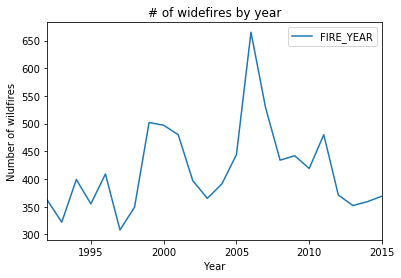

In [7]:
pd.DataFrame(df.FIRE_YEAR.value_counts()).sort_index().plot()
plt.title("# of widefires by year")
plt.xlabel("Year")
plt.ylabel("Number of wildfires")

Text(0.5,0,u'Number of wildfires')

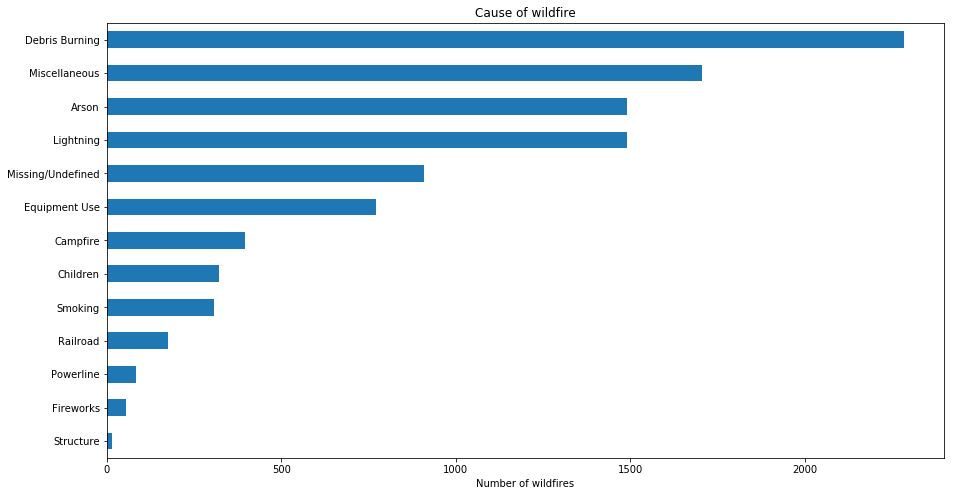

In [8]:
plt.figure(figsize=(15,8))
df.STAT_CAUSE_DESCR.value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Cause of wildfire")
plt.xlabel("Number of wildfires")

Text(0.5,1,u'Wildfire location by Latitude and Longitude')

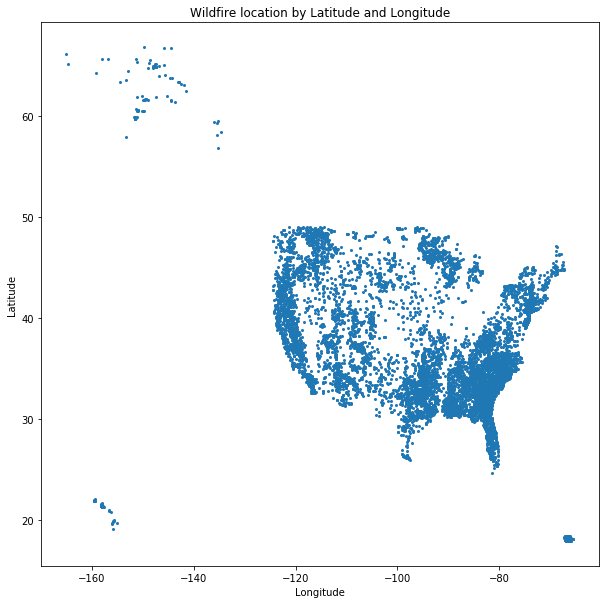

In [9]:
color_map = { "Debris Burning": "red",
              "Miscellaneous" : "sandybrown",
              "Arson" : "gold",
              "Lightning": "olivedrab",
              "Missing/Undefined": "",
              "Equipment Use": "darkgreen",
              "Campfire": "navy",
              "Children": "m",
              "Smoking": "orange",
              "Railroad": "aqua",
              "Powerline": "saddlebrown",
              "Fireworks": "darkslategrey",
              "Structure": "lightpink"}

size_map = {
    "A" : 7,
    "B" : 6,
    "C" : 5,
    "D" : 4,
    "E" : 3,
    "F" : 2,
    "G" : 1,
}

colors = []
for i in df.STAT_CAUSE_DESCR:
    colors.append(color_map[i])
    
sizes = []
for s in df.FIRE_SIZE_CLASS:
    sizes.append(size_map[s])

plt.figure(figsize=(10,10))
plt.plot(df.LONGITUDE, df.LATITUDE, 'o', markersize=2)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Wildfire location by Latitude and Longitude")

Text(0,0.5,u'Fire size')

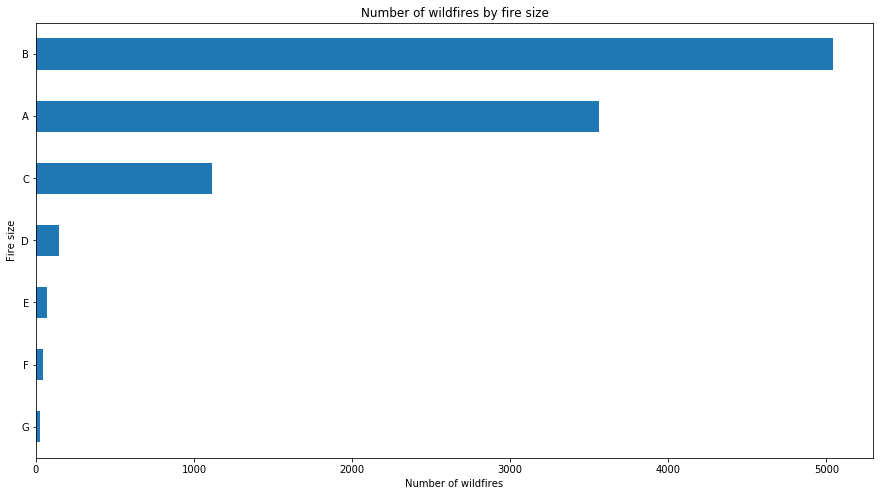

In [10]:
plt.figure(figsize=(15,8))
df.FIRE_SIZE_CLASS.value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Number of wildfires by fire size")
plt.xlabel("Number of wildfires")
plt.ylabel("Fire size")